In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#install required python packages if not already installed

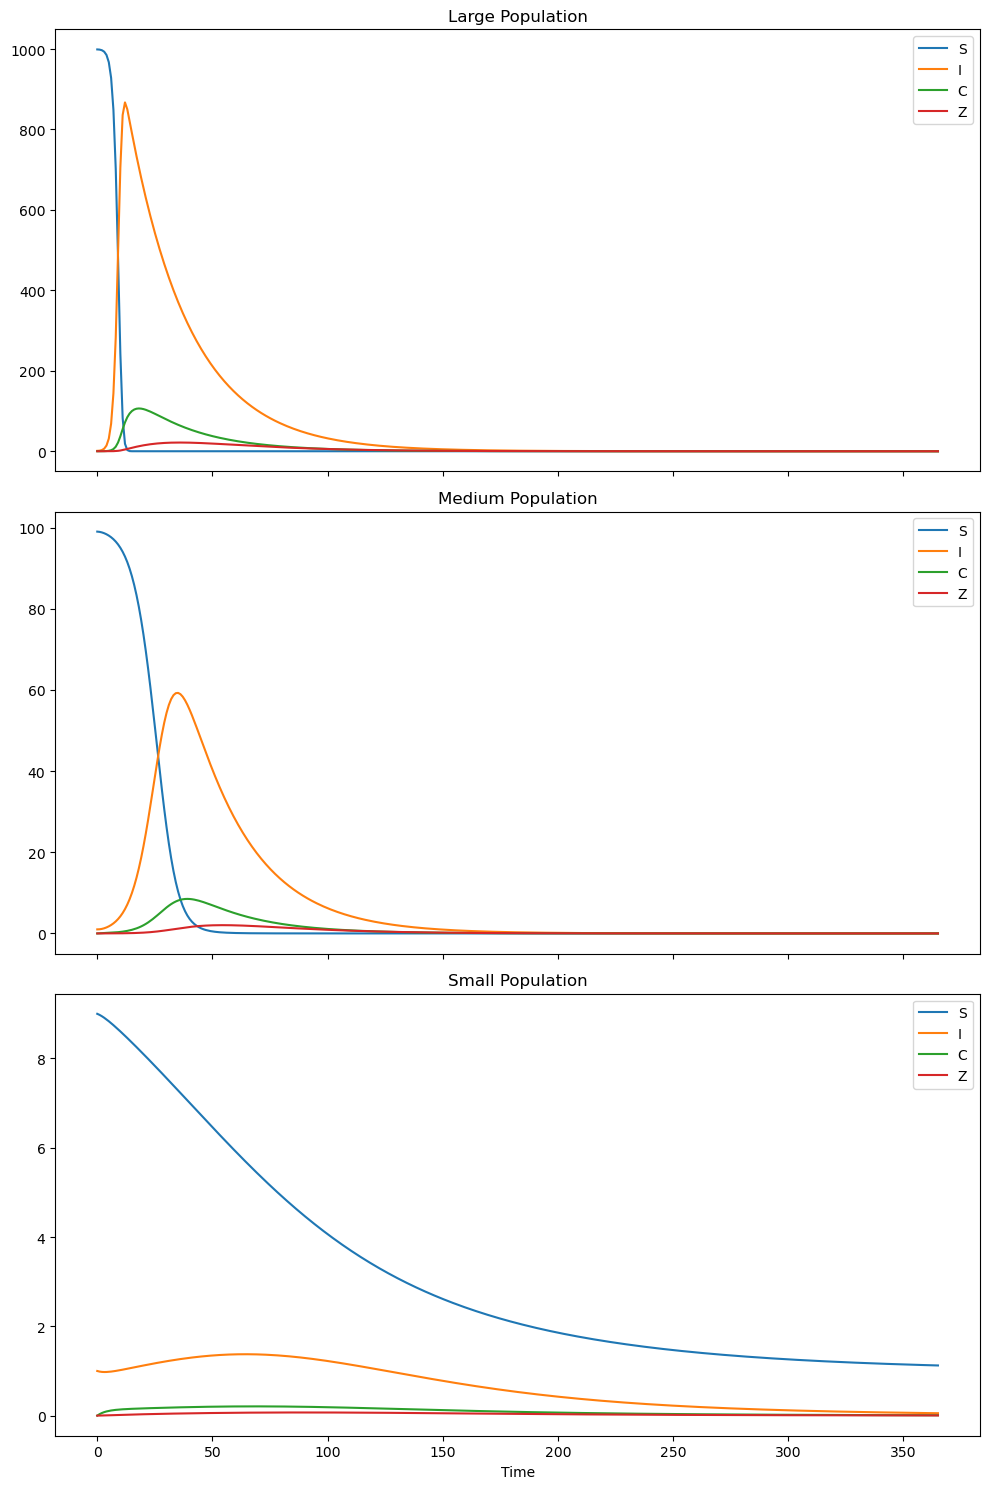

In [33]:
import pandas as pd

# Define the SICZ model
def SICZ(x, t, parameters):
  S, I, C, Z = x
  N = S + I + C

  beta_p = parameters['beta_p']
  beta_c = parameters['beta_c']
  beta_z = parameters['beta_z']
  a = parameters['a']
  lamdaC = parameters['lamdaC']
  sigma = parameters['sigma']
  mu = parameters['mu']
  lamdaZ = parameters['lamdaZ']
  r = parameters['r']

  dS = -(S * beta_p * (I / N)) - (S * beta_c * C) - (S * beta_z * Z)
  dI = (S * beta_p * (I / N)) + (S * beta_c * C) + (S * beta_z * Z) - (I * a)
  dC = (I * a) - (C * lamdaC)
  dZ = (I * sigma) + (C * mu) - (Z * lamdaZ)

  return [dS, dI, dC, dZ]

# Initial conditions for different population sizes
initial_cond_Large = [999, 1, 0, 0]
initial_cond_Med = [99, 1, 0, 0]
initial_cond_Small = [9, 1, 0, 0]

# Time points
times = np.linspace(0, 365, 365)

# Parameters
params = {
  "beta_p": 0.023,
  "beta_c": 0.023,
  "beta_z": 0.0001,
  "lamdaC": 1/4,
  "lamdaZ": 1/21.6,
  "sigma": 0.001,
  "mu": 0.01,
  "a": 1/26.5,
  "r": 0  # Set to 0 if not used
}

# Solve ODEs
resultsSICZLarge = odeint(SICZ, initial_cond_Large, times, args=(params,))
resultsSICZMed = odeint(SICZ, initial_cond_Med, times, args=(params,))
resultsSICZSmall = odeint(SICZ, initial_cond_Small, times, args=(params,))

# Convert results to DataFrame for plotting

df_large = pd.DataFrame(resultsSICZLarge, columns=['S', 'I', 'C', 'Z'])
df_large['time'] = times

df_med = pd.DataFrame(resultsSICZMed, columns=['S', 'I', 'C', 'Z'])
df_med['time'] = times

df_small = pd.DataFrame(resultsSICZSmall, columns=['S', 'I', 'C', 'Z'])
df_small['time'] = times

# Plotting
fig, axs = plt.subplots(3, 1, figsize=(10, 15), sharex=True)

for df, title, ax in zip([df_large, df_med, df_small],
             ["Large Population", "Medium Population", "Small Population"],
             axs):
  ax.plot(df['time'], df['S'], label='S')
  ax.plot(df['time'], df['I'], label='I')
  ax.plot(df['time'], df['C'], label='C')
  ax.plot(df['time'], df['Z'], label='Z')
  ax.set_title(title)
  ax.legend()

plt.xlabel('Time')
plt.tight_layout()
plt.show()


downloaded and R file
had to install new packagaes (scipy)
troubleshoot problems tht came up.